## 主題: 時事新聞在不同新聞頻道 (youtube) 的輿論分析

共爬取以下6個新聞頻道的 youtube 影片, 且為同一個時事新聞 - 蔡英文總統打高端疫苗 

video 1)  蔡英文官方頻道 806則留言：https://www.youtube.com/watch?v=RmBFoslxgqA  
video 2)  中時新聞網 374留言 :  https://www.youtube.com/watch?v=OmPL9xbwEA4  
video 3)  華視新聞 205留言 : https://www.youtube.com/watch?v=8iSzsVe7WcQ  
video 4)  三立新聞 869留言 https://www.youtube.com/watch?v=bOE82wt8dR8  
video 5)  民視：198留言 https://www.youtube.com/watch?v=IFo1XWV_lGg   
video 6)  udn video 665留言 https://www.youtube.com/watch?v=mYW3OfpeFJQ&t=1s  


In [7]:
import glob
import jieba
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import wordcloud
import pandas as pd
import numpy as np
import seaborn as sns

from collections import Counter
from configparser import ConfigParser
from PIL import Image
from matplotlib.font_manager import FontProperties
from snownlp import SnowNLP

In [ ]:
config = configparser.ConfigParser()
config.read("src/config.ini", encoding="utf-8")
all_id_list = config["VIDEO_ID"]["ID_LIST"]
file = glob.glob('../*.csv')
form = pd.read_csv(file)

comment_df_final = pd.DataFrame()
comment_df_final = comment_df_final.append(form)

In [171]:
comment_df_final

,comments,video_num
0,小英总统好！！！🙏同为女性我们以您为豪！！！👍👍👍🌷🌷😄,video1
1,打高端上云端加油打🤣,video1
2,蔡英文加油啊~疫情打針顧好身體健康！是重要的顧好👌載口罩消毒洗乾淨洗手必須不要去太多人的地方...,video1
3,總統也兼差業務啊,video1
4,愛做秀大騙子、說慌成性,video1
...,...,...
460,跳樑小丑喝符水騙小騙鼻讓台灣人取笑的把戲而已,video6
461,國產疫苗加油讓國民黨繼續崩潰,video6
462,徐小新有本事和菜头一样打生理盐水,video6
463,你是在酸習近平國小領導人？,video6


## 文字雲視覺化

Building prefix dict from /Users/irene.tong/irene904_cc/dict.txt.big ...
Loading model from cache /var/folders/jc/67kbmkd55bl0mk167k4k34dh0000gn/T/jieba.u19f7b55bc9c6ab1751a938d8565bf23d.cache
Loading model cost 1.715 seconds.
Prefix dict has been built successfully.
Building prefix dict from /Users/irene.tong/irene904_cc/dict.txt.big ...
Loading model from cache /var/folders/jc/67kbmkd55bl0mk167k4k34dh0000gn/T/jieba.u19f7b55bc9c6ab1751a938d8565bf23d.cache
Loading model cost 0.999 seconds.
Prefix dict has been built successfully.
Building prefix dict from /Users/irene.tong/irene904_cc/dict.txt.big ...
Loading model from cache /var/folders/jc/67kbmkd55bl0mk167k4k34dh0000gn/T/jieba.u19f7b55bc9c6ab1751a938d8565bf23d.cache
Loading model cost 1.038 seconds.
Prefix dict has been built successfully.
Building prefix dict from /Users/irene.tong/irene904_cc/dict.txt.big ...
Loading model from cache /var/folders/jc/67kbmkd55bl0mk167k4k34dh0000gn/T/jieba.u19f7b55bc9c6ab1751a938d8565bf23d.cache
Loa

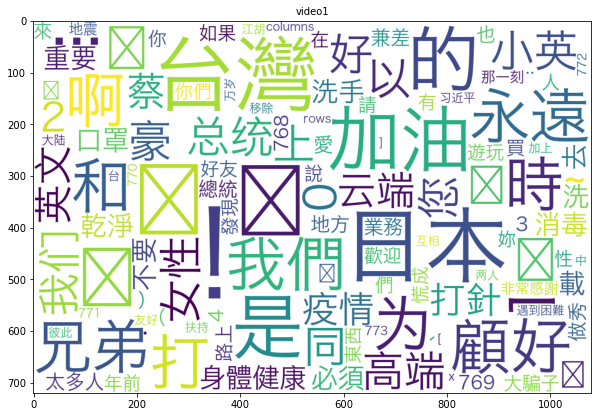

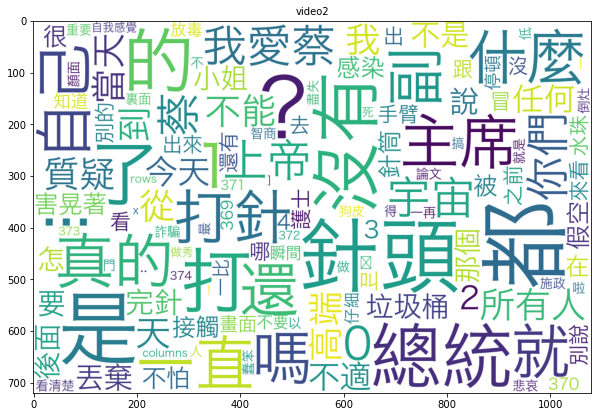

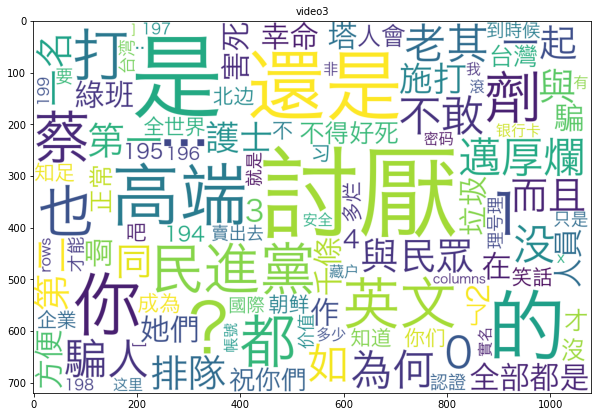

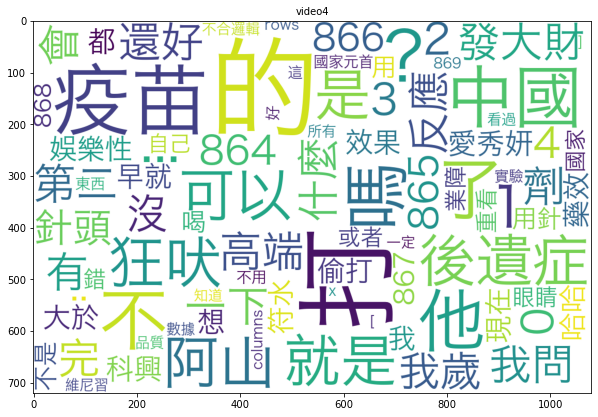

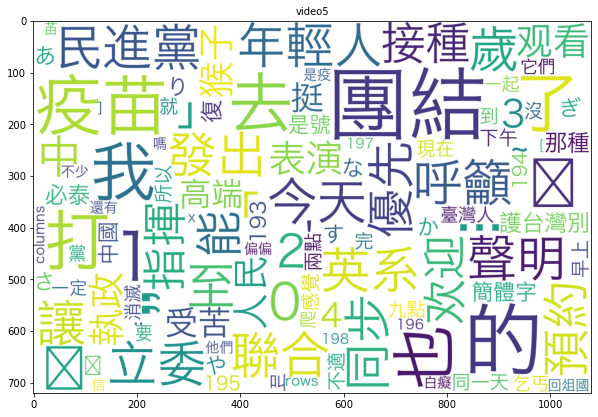

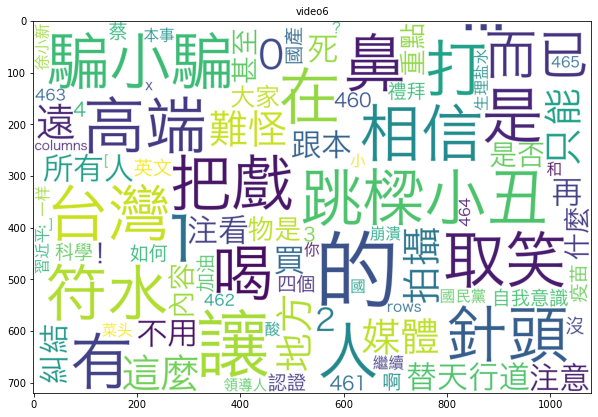

In [172]:
for video_num in range(1, len(all_id_list)+1):
    jieba.set_dictionary('dict.txt.big')
    filt = (comment_df_final['video_num'] == f'video{video_num}')
    dd = str(comment_df_final.loc[filt, ['comments']])
    segs = jieba.cut(dd, cut_all= False)
    dictionary = Counter(segs)
    if 'comments' in dictionary:
        del dictionary['comments']
    
    font_path = 'Hiragino Sans GB.ttc'
    wc = wordcloud.WordCloud(background_color='white',
                         margin=2,
                         font_path = font_path,
                         max_words=200,
                         width=1080, height=720,
                         relative_scaling=0.5
                         )

    wc.generate_from_frequencies(dictionary)
    wc.to_file(f'video{count}.png')
    plt.figure(figsize=(10,10))
    plt.title(f'video{video_num}', {'fontsize':10})
    plt.imshow(wc)

### 文字雲 Highlight  
- video 1 : 台灣, 加油, 日本, 兄弟   
- video 2 : 針頭, 總統, 質疑, 主席  
- video 3 : 討厭, 民進黨, 高端, 騙人  
- video 4 : 中國, 狂吠, 疫苗, 發大財, 後遺症  
- video 5 : 年輕人, 團結, 英系, 呼籲, 表演  
- video 6 : 把戲, 跳梁小丑, 取笑, 高端, 針頭  

## 情緒分析 (By SnowNLP)

In [180]:
def generate_result(video_num, df):
    result = []
    positive = 0
    neutral = 0
    negative = 0
    tem_df = df[df['video_num'] == f"video{video_num}"]
    data_list = tem_df['comments'].tolist()

    for data in data_list: 
        if len(data) > 0:
            output = SnowNLP(data).sentiments
            result.append(output)
            
            if output >= 0.75:
                positive += 1
            elif 0.45 <= output < 0.75:
                neutral += 1
            else:
                negative += 1
            
        else:
            continue
    mean = numpy.mean(result)
    return video_num, mean, positive, neutral, negative


In [181]:
result_final = pd.DataFrame()
scoring = []

for video_num in range(1, len(all_id_list)+1):
    raw_result = generate_result(video_num, comment_df_final)
    scoring.append(raw_result)
    
scoring_df = pd.DataFrame (scoring, columns = ['video_id','sentiment_score','positive','neutral','negative'])


In [197]:
scoring_df['youtube_news_channel'] = ['Tsai Ing-wen youtube','China Times','China TV News','SET News Channel','FTV News Channel','UDN Video']

In [198]:
scoring_df

,video_id,sentiment_score,positive,neutral,negative,youtube_news_channel
0,1,0.460231,242,139,387,Tsai Ing-wen youtube
1,2,0.366514,61,85,228,China Times
2,3,0.320192,32,38,129,China TV News
3,4,0.440200,250,160,455,SET News Channel
4,5,0.430523,59,35,104,FTV News Channel
5,6,0.352611,94,70,301,UDN Video


- 0~1分的 sentiment_score, 越高分代表留言越正面
- 所有影片的平均 sentiment_score 皆偏向負面 ( < 0.5 )
- 以留言數來看, 蔡英文官方頻道及三立新聞網的整體留言數以及正面留言數皆是最多的 

### 將 Dataframe 轉 bar plot

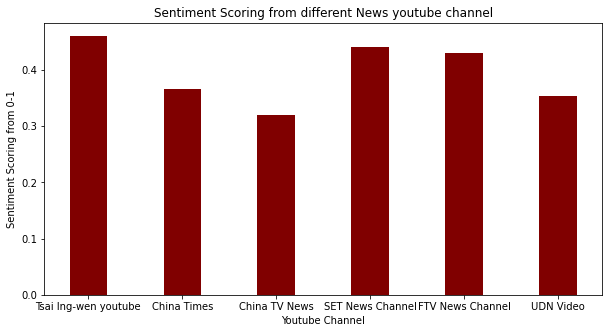

In [199]:
video_id = scoring_df['youtube_news_channel']
sentiment_score = scoring_df['sentiment_score']
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(video_id, sentiment_score, color ='maroon',
        width = 0.4)
 
plt.xlabel("Youtube Channel")
plt.ylabel("Sentiment Scoring from 0-1")
plt.title("Sentiment Scoring from different News youtube channel")
plt.show()

- 將不同頻道的情緒分析分數視覺化 
- 蔡英文 youtube 頻道, 三立新聞 (SET), 民視新聞 (FTV) 留言為正面文字情緒最高的三個影片
- 中時新聞網 (China Times) , 華視新聞網 (China TV news) , UDN Video 留言為負面文字情緒最高的三個影片


### 將每一個頻道的正負面留言比例, 以圓餅圖方式呈現

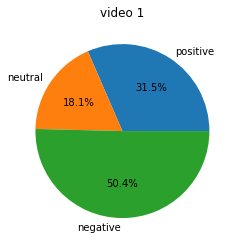

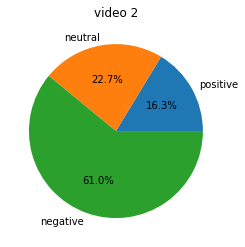

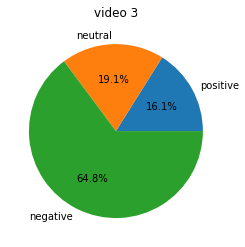

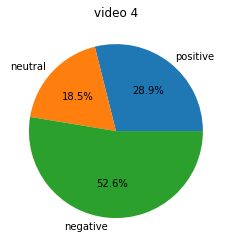

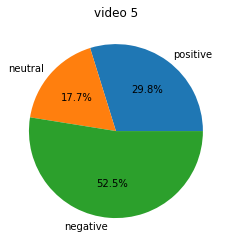

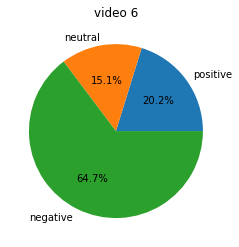

In [204]:
for video_num in range(0, len(all_id_list)):
    labels = 'positive','neutral','negative'
    size = scoring_df.loc[video_num,'positive':'negative']
    plt.pie (size, labels = labels, autopct = '%1.1f%%')
    plt.title(f'video {video_num + 1}')
    plt.show()

- 以不同頻道的正面,中立,負面留言比例來看
- 蔡英文 youtube 頻道, 三立新聞 (SET), 民視新聞 (FTV) 雖然為平均正面分數為最高的三個頻道, 偏向負面的留言仍然佔了約50%
- 中時新聞網 (China Times) , 華視新聞網 (China TV news) , UDN Video 負面留言比率更是佔了 > 60%